In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("/kaggle/input/oil-production/oil_production_statistics.csv", encoding='ISO-8859-1')

In [7]:
df.head(2)

,country_name,type,product,flow,year,value
0,Australia,Balance,Crude oil,Industrial Production,2021,18029.678
1,Austria,Balance,Crude oil,Industrial Production,2021,561.852


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  2376 non-null   object 
 1   type          2376 non-null   object 
 2   product       2376 non-null   object 
 3   flow          2376 non-null   object 
 4   year          2376 non-null   int64  
 5   value         2376 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 111.5+ KB


In [9]:
df.describe()

,year,value
count,2376.000000,2376.000000
mean,2021.863636,6298.349414
std,0.868591,36784.314385
min,2021.000000,-2442.000000
25%,2021.000000,48.559500
50%,2022.000000,462.107500
75%,2023.000000,2594.835250
max,2023.000000,790672.407000


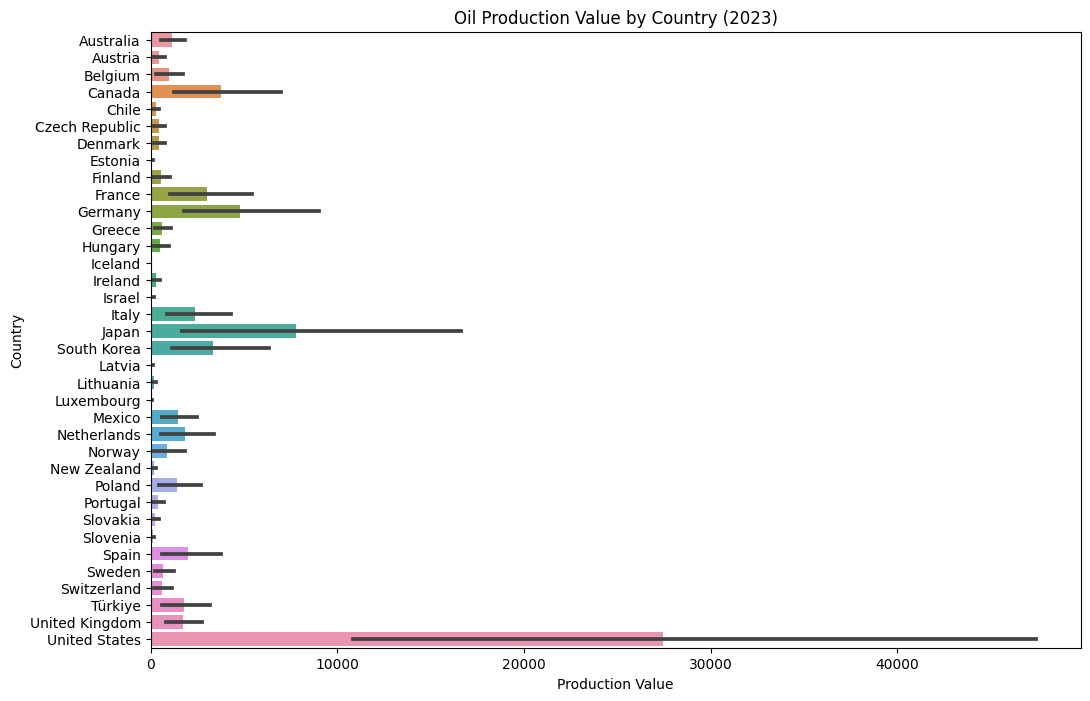

In [12]:
# Plotting oil production value by country for the latest year
latest_year = df['year'].max()
plt.figure(figsize=(12, 8))
sns.barplot(data=df[df['year'] == latest_year], x='value', y='country_name')
plt.title(f'Oil Production Value by Country ({latest_year})')
plt.xlabel('Production Value')
plt.ylabel('Country')
plt.show()

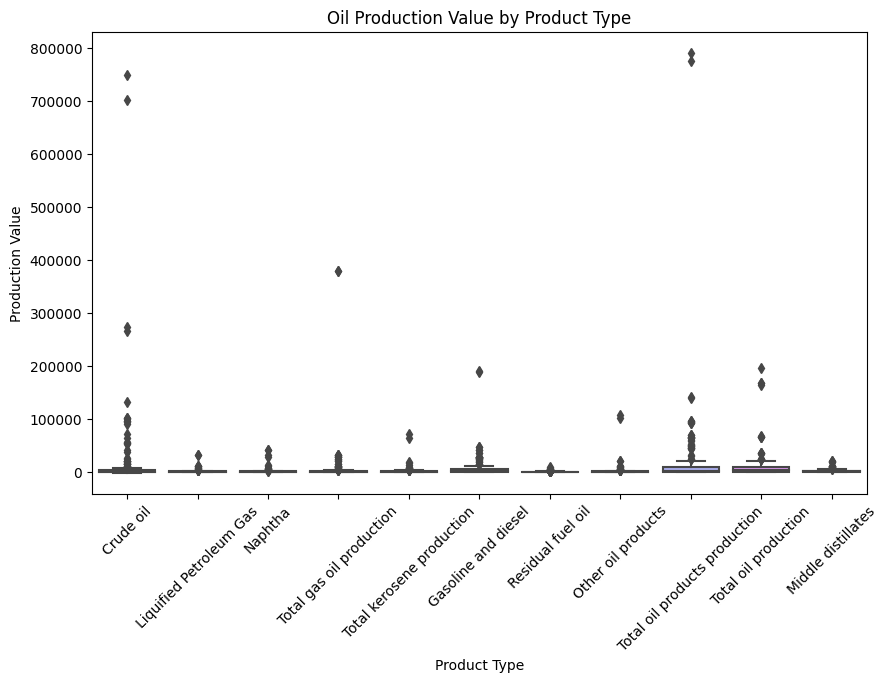

In [16]:
# Plotting oil production value by product type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='product', y='value')
plt.title('Oil Production Value by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Production Value')
plt.xticks(rotation=45)
plt.show()

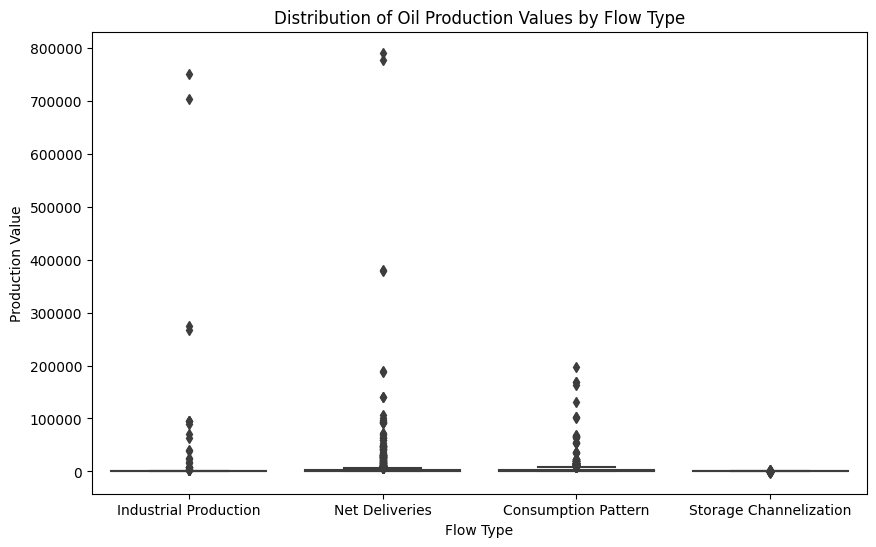

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='flow', y='value')
plt.title('Distribution of Oil Production Values by Flow Type')
plt.xlabel('Flow Type')
plt.ylabel('Production Value')
plt.show()

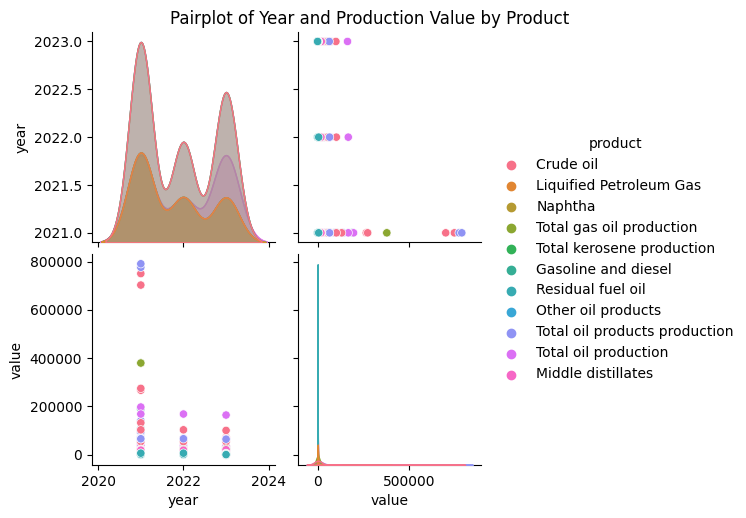

In [26]:
sns.pairplot(df, vars=['year', 'value'], hue='product')
plt.suptitle('Pairplot of Year and Production Value by Product', y=1.02)
plt.show()

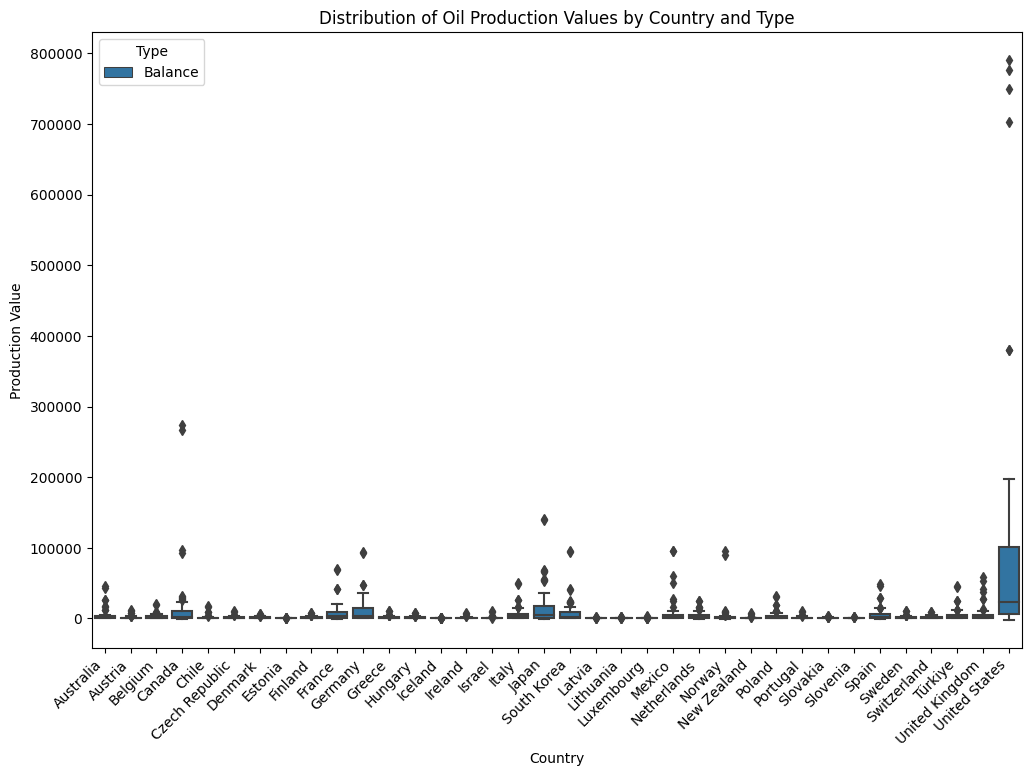

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='country_name', y='value', hue='type')
plt.title('Distribution of Oil Production Values by Country and Type')
plt.xlabel('Country')
plt.ylabel('Production Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.show()

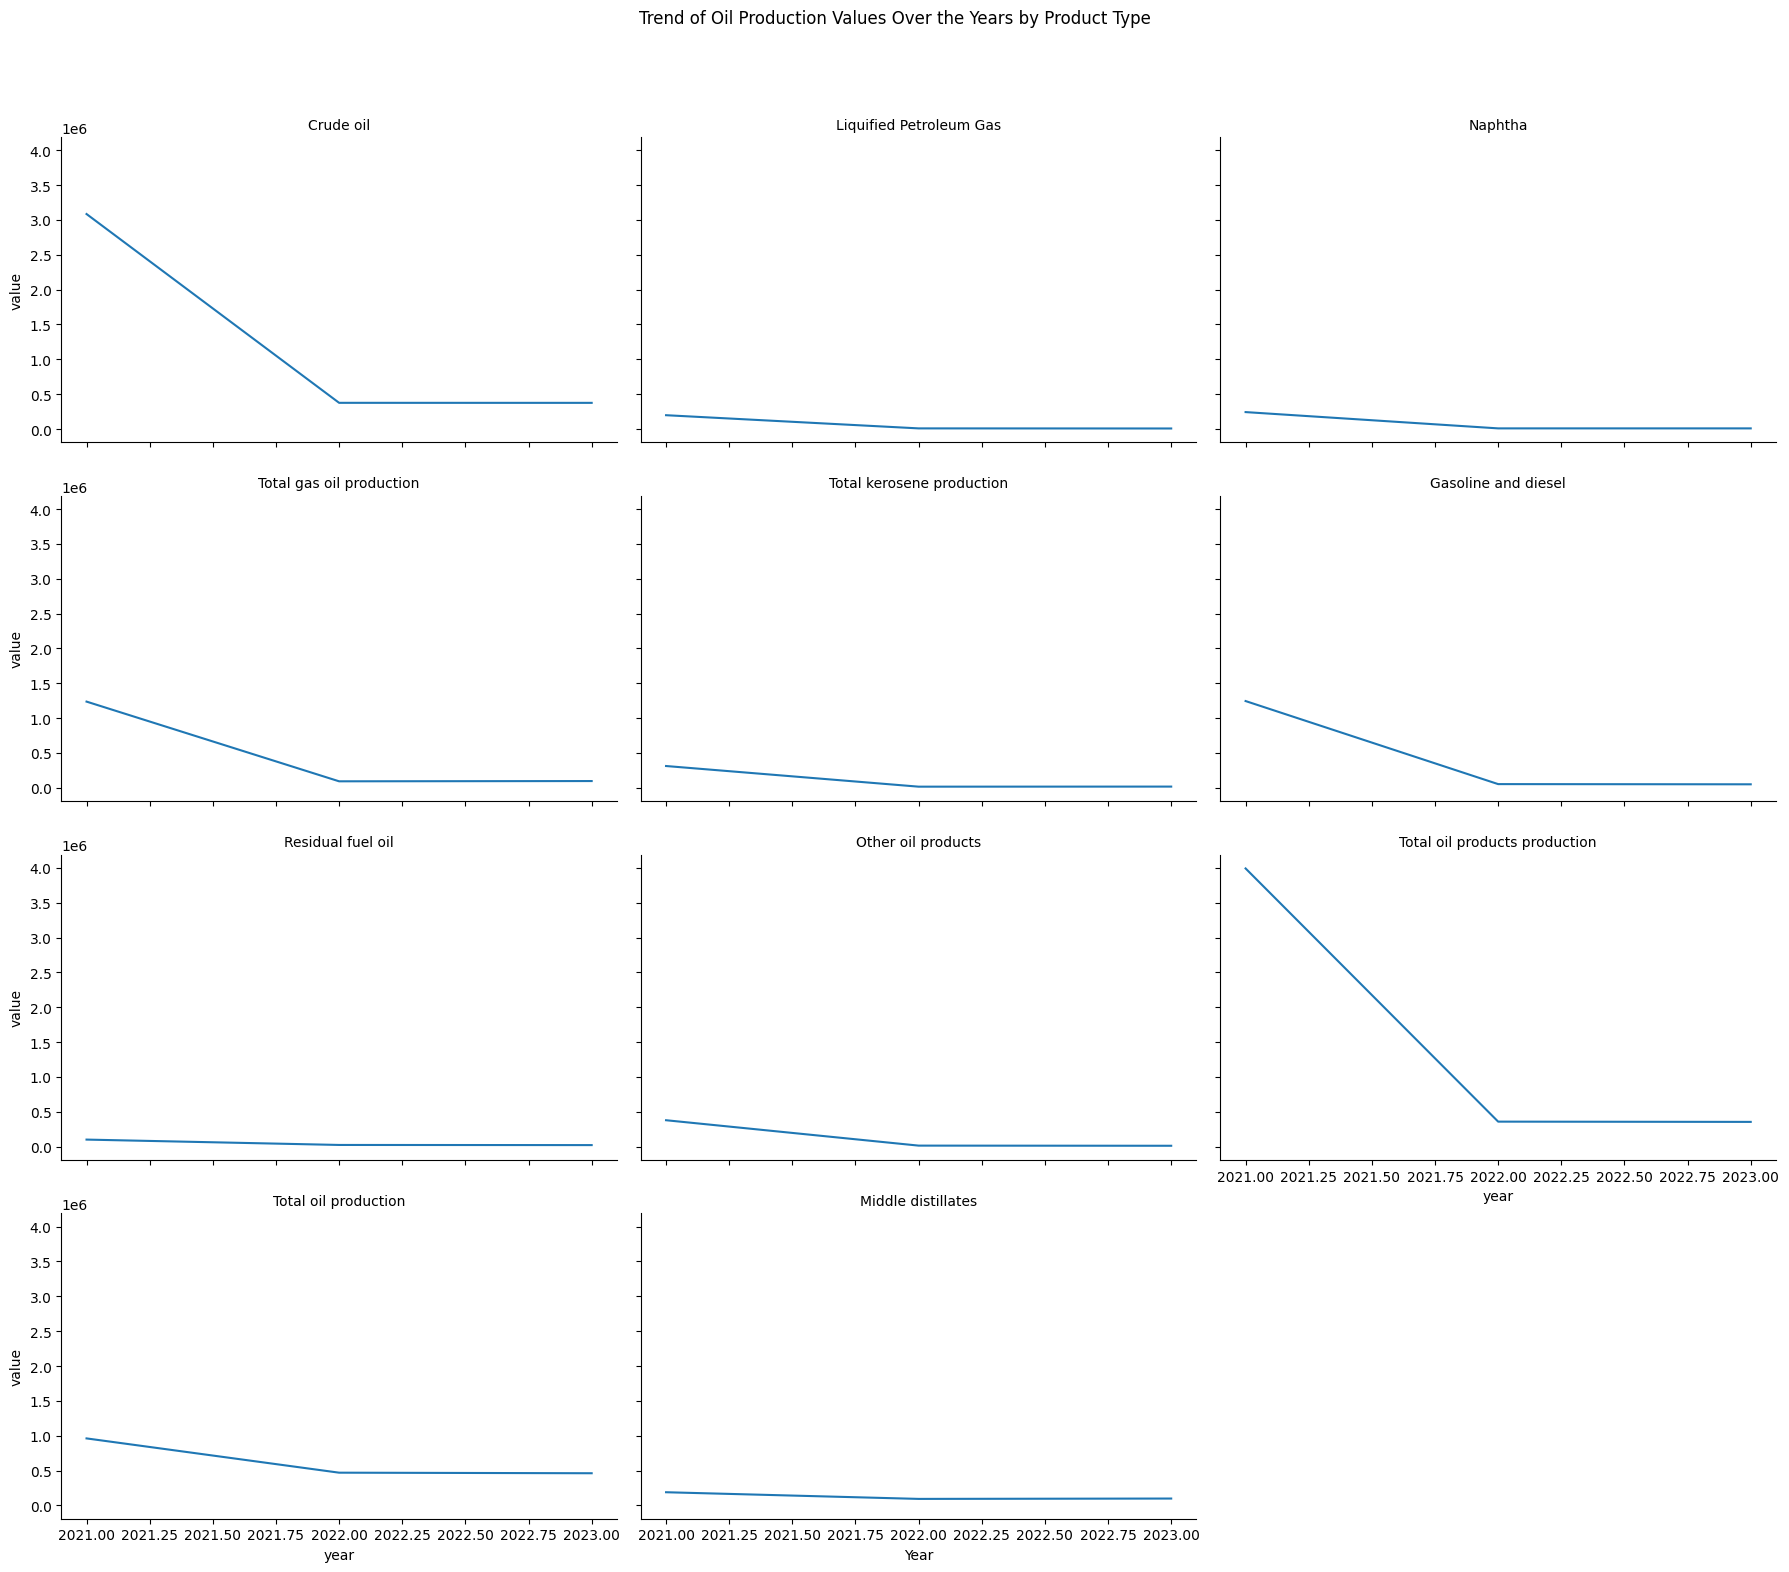

In [29]:
g = sns.FacetGrid(df, col='product', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'year', 'value', estimator='sum', ci=None)
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Trend of Oil Production Values Over the Years by Product Type')
plt.xlabel('Year')
plt.ylabel('Total Production Value')
plt.show()

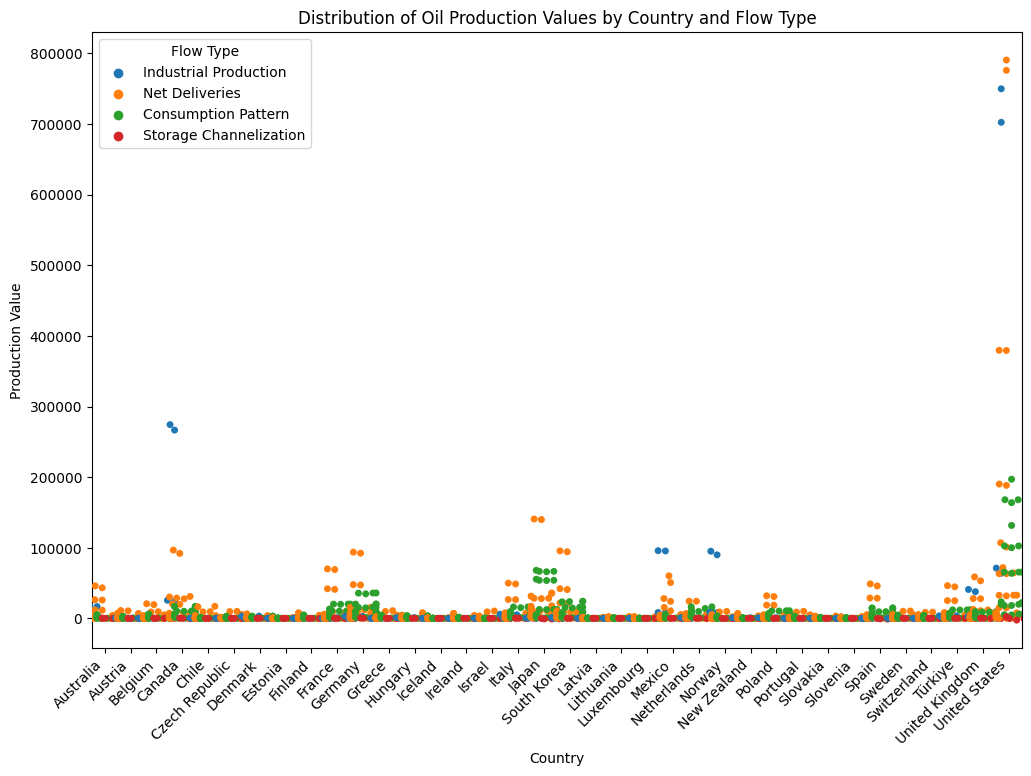

In [30]:
plt.figure(figsize=(12, 8))
sns.swarmplot(data=df, x='country_name', y='value', hue='flow', dodge=True)
plt.title('Distribution of Oil Production Values by Country and Flow Type')
plt.xlabel('Country')
plt.ylabel('Production Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Flow Type')
plt.show()

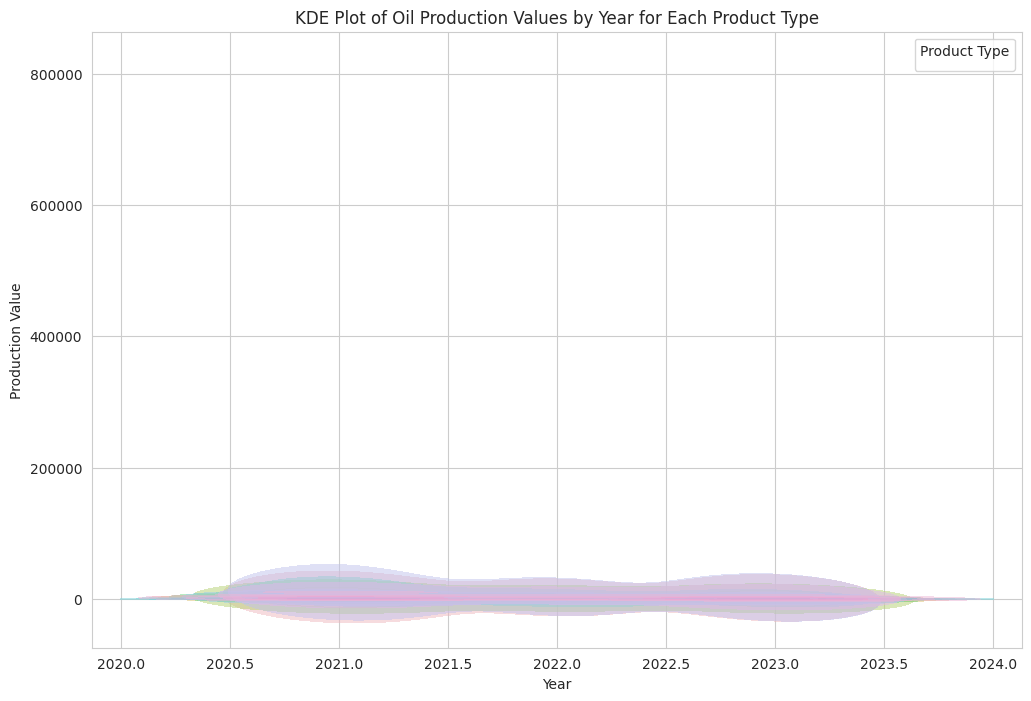

In [34]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='year', hue='product', y='value', fill=True, palette='husl', alpha=0.5, linewidth=0)
plt.title('KDE Plot of Oil Production Values by Year for Each Product Type')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.legend(title='Product Type')
plt.show()